Online Retail EDA

Dataset Preview
* Dataset Online Retail chứa dữ liệu giao dịch từ một siêu thị/retail shop ở UK. Các trường chính:

* InvoiceNo: Mã hóa đơn

* StockCode: Mã sản phẩm

* Description: Tên sản phẩm

* Quantity: Số lượng sản phẩm đặt hàng

* InvoiceDate: Ngày & giờ giao dịch

* UnitPrice: Giá một đơn vị sản phẩm

* CustomerID: ID khách hàng

* Country: Quốc gia

Import thư viện

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Online Retail.xlsx")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Kiểm tra tính toàn vẹn

In [ ]:
print(df.shape)        
print(df.info())       
print(df.describe())   

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%        

Clean miss data

In [6]:
df = df.dropna(subset=["CustomerID", "Description"])

df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

df["Revenue"] = df["Quantity"] * df["UnitPrice"]


Univariate Analysis

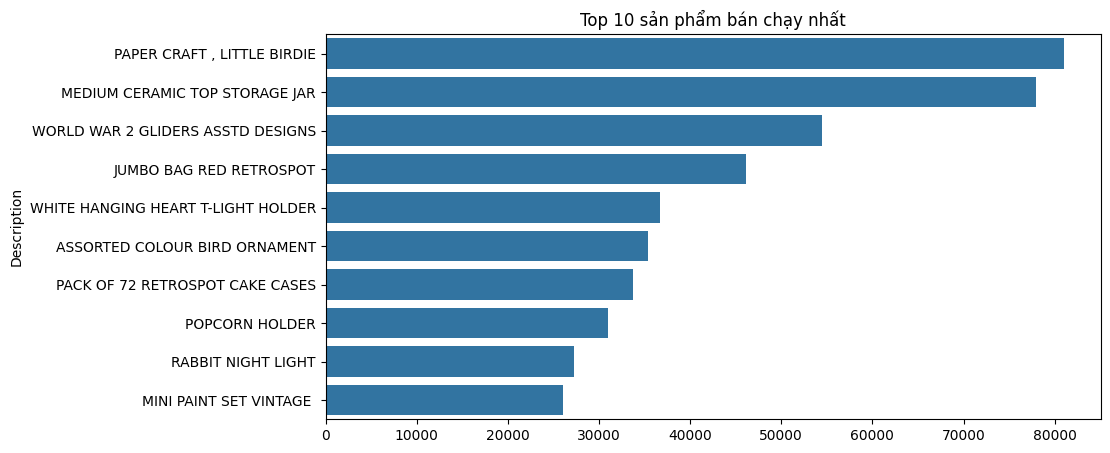

In [7]:
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 sản phẩm bán chạy nhất")
plt.show()

Phân phối giá trị đơn hàng

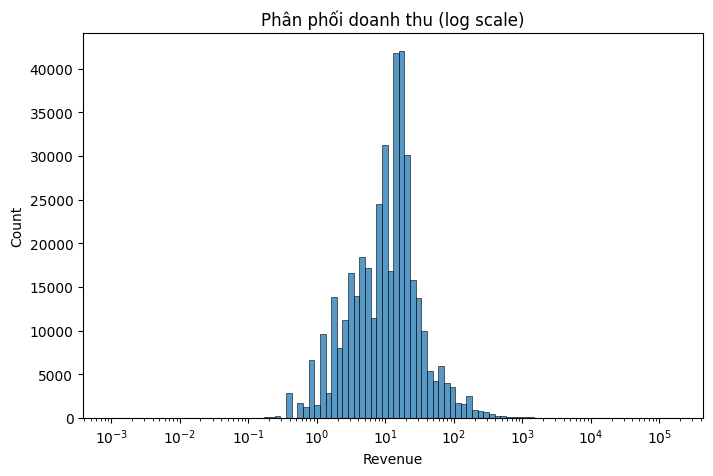

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["Revenue"], bins=100, log_scale=True)
plt.title("Phân phối doanh thu (log scale)")
plt.show()

Bivariate Analysis

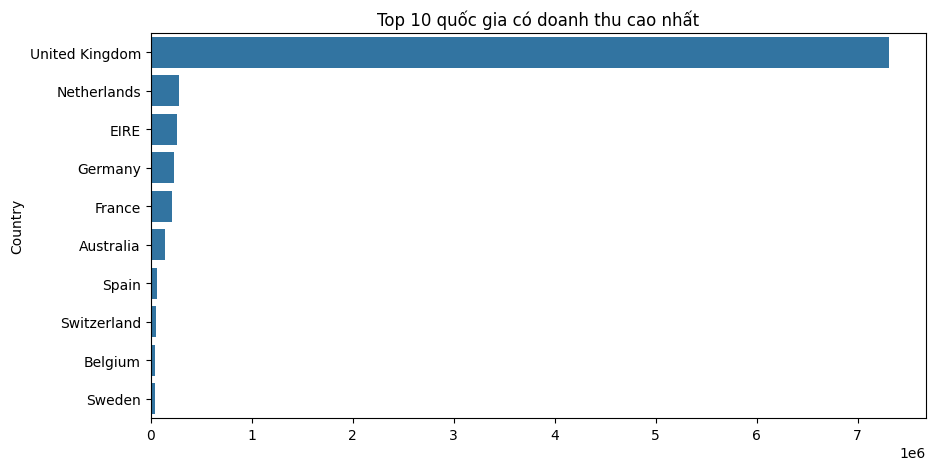

In [9]:
country_revenue = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_revenue.values, y=country_revenue.index)
plt.title("Top 10 quốc gia có doanh thu cao nhất")
plt.show()


Monthly Income

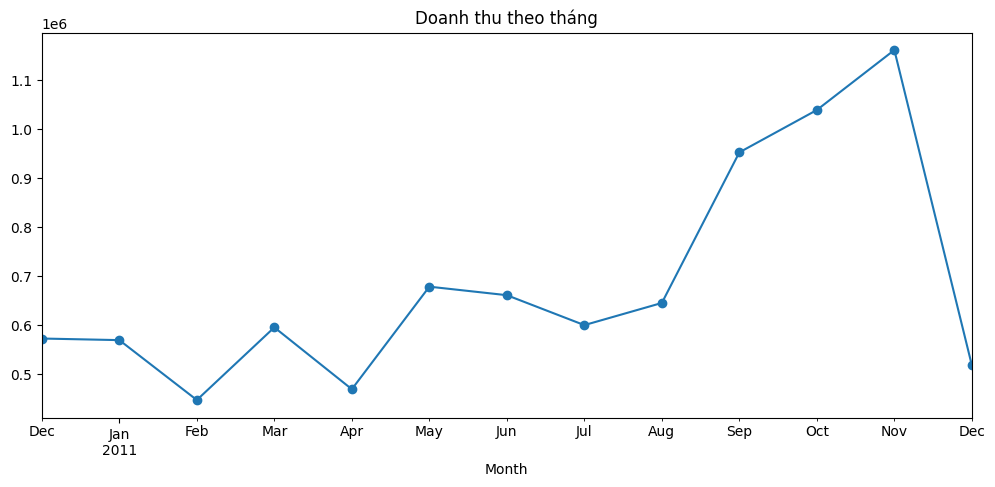

In [10]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Month"] = df["InvoiceDate"].dt.to_period("M")
monthly_revenue = df.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(12,5))
monthly_revenue.plot(kind="line", marker="o")
plt.title("Doanh thu theo tháng")
plt.show()


Customers analysis

In [11]:
print("Số khách hàng duy nhất:", df["CustomerID"].nunique())

Số khách hàng duy nhất: 4338


Customer-based Income

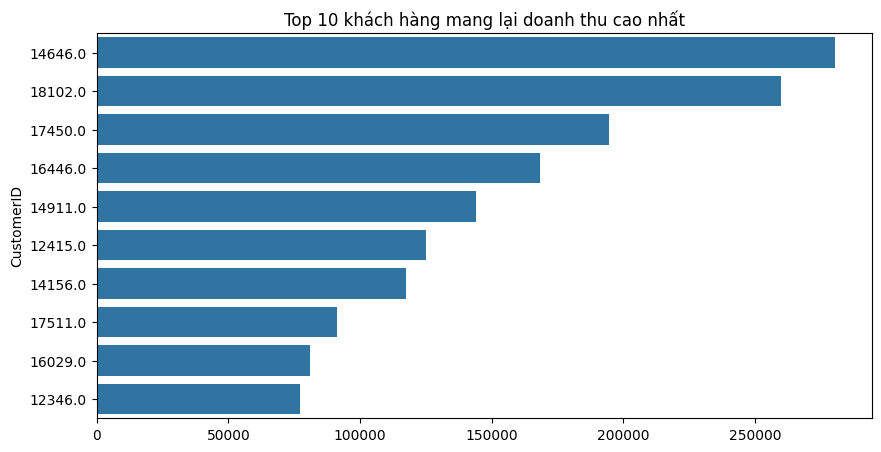

In [12]:
top_customers = df.groupby("CustomerID")["Revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str))
plt.title("Top 10 khách hàng mang lại doanh thu cao nhất")
plt.show()
